In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
filepath = 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv'
df = pd.read_csv(filepath, header=0)
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
#Q1
df['Company Name'].nunique()

439

In [8]:
#Q2
df1 = df.groupby('City')['Job created'].sum()
df1

City
Astoria                 0.0
BRONX                   0.0
BROOKLYN                0.0
BROOKLYN HEIGHT         0.0
Bronx                  19.0
Bronx,                  0.0
Brookln                 0.0
Brooklym                0.0
Brooklyn               25.0
Brooklyn,               0.0
COLLEGE POINT           0.0
College Point          12.0
Far Rockaway            0.0
Flushing                0.0
Forest Hills            0.0
GLENDALE                0.0
INWOOD                  0.0
Jamaica                 0.0
L.I.C.                  0.0
LONG ISLAND CITY        0.0
Lond Island City        0.0
Long Island City        0.0
Maspeth                 0.0
NEW YORK                0.0
NY                      0.0
New YOrk                0.0
New York                0.0
Ozone Park              0.0
PORT MORRIS             0.0
QUEENS                  0.0
Queens                 90.0
Queens Village          0.0
RIDGEWOOD               0.0
Ridgewood               0.0
Springfield Gardens     0.0
Staten Island  

In [9]:
df1['Queens']

90.0

In [10]:
#Q3
df['company email'].nunique()

420

In [12]:
#Q4
data = df.groupby('NTA').aggregate({'Company Name': 'count', 
                                    'Total Savings': 'median', 
                                    'Job created': 'sum'})
result = data[data['Company Name']>=5]
result

,Company Name,Total Savings,Job created
NTA,,,
Battery Park City-Lower Manhattan,9,302959.400,0.0
Bushwick South,10,6685.650,10.0
Carroll Gardens-Columbia Street-Red Hook,11,2057.250,0.0
College Point,7,3214.340,2.0
Crown Heights North,9,2112.960,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,21060.250,0.0
East New York,9,8319.020,15.0
East Williamsburg,11,16342.220,0.0
Greenpoint,14,5532.190,0.0


In [13]:
result.shape

(20, 3)

In [14]:
#Q5
from pathlib import Path
file = Path('result.csv')
result.to_csv(file, header=True, index=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total Savings', ylabel='Job created'>

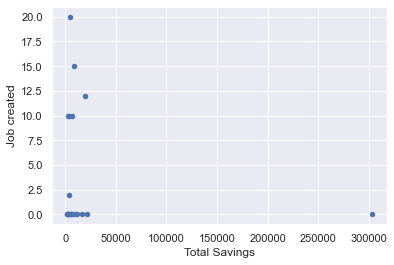

In [15]:
result.plot('Total Savings', 'Job created', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total Savings', ylabel='Job created'>

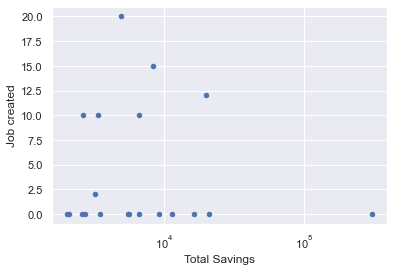

In [16]:
result.plot('Total Savings', 'Job created', kind='scatter', logx=True)

<AxesSubplot:ylabel='Frequency'>

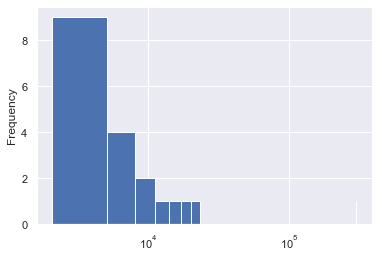

In [17]:
result['Total Savings'].plot(kind='hist', bins=100, logx=True)

In [18]:
df['Effective Date']

0       3/4/2005
1       4/2/2008
2       1/5/2015
3       2/3/2020
4      6/30/2017
         ...    
445    12/9/2008
446    12/5/2017
447     8/3/2018
448    1/26/2016
449    10/3/2019
Name: Effective Date, Length: 450, dtype: object

In [19]:
df.index = pd.to_datetime(df['Effective Date'])
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
Effective Date,,,,,,,,,,,,,,,,,,,,,
2005-03-04,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
2008-04-02,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2015-01-05,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
2020-02-03,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
2017-06-30,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [24]:
ts_M = df['Job created'].resample('M').sum()
ts_M

Effective Date
1993-02-28    15.0
1993-03-31     0.0
1993-04-30     0.0
1993-05-31     0.0
1993-06-30     0.0
              ... 
2020-03-31     0.0
2020-04-30     0.0
2020-05-31     0.0
2020-06-30     0.0
2020-07-31     0.0
Freq: M, Name: Job created, Length: 330, dtype: float64

<AxesSubplot:xlabel='Effective Date'>

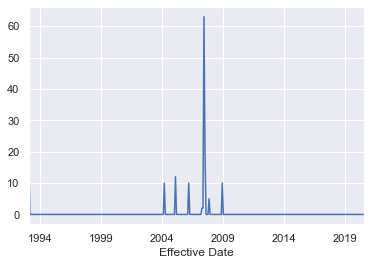

In [25]:
ts_M.plot()